## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

<div id="Contents"></div><h1>Contents</h1>

1. <a href='#Section 1'>Dataset acquaintance</a>

    <a href='#q1.1'>Q1.1</a>
    <a href='#q1.2'>Q1.2</a>
      <a href='#q1.3'>Q1.3</a>
      <a href='#q1.4'>Q1.4</a>
      <a href='#q1.5'>Q1.5</a>
      <a href='#q1.6'>Q1.6</a>
      <a href='#q1.7'>Q1.7</a>
      <a href='#q1.8'>Q1.8</a>
      <a href='#q1.9'>Q1.9</a>
      <a href='#q1.10'>Q1.10</a>
      <a href='#q1.11'>Q1.11</a>
      <a href='#q1.12'>Q1.12</a>


2. <a href='#Section 2'>Feature Generation</a>

      <a href='#q2.1'>Q2.1</a>
      <a href='#q2.2'>Q2.2</a>
      <a href='#q2.3'>Q2.3</a>
      <a href='#q2.4'>Q2.4</a>
      <a href='#q2.5'>Q2.5</a>
      <a href='#q2.6'>Q2.6</a>
      
      
3. <a href='#Section 3'>Preprocessing</a>
    <ul>
    <li><a href='#q3.1'>Q3.1 Drop the leaking columns</a></li>
      <li><a href='#q3.2'>Q3.2 Deal with the categorical features</a></li>
      <li><a href='#q3.3'>Q3.3 Split the dataset</a></li>
      <li><a href='#q3.4'>Q3.4 Scale the numeric columns with standard scaler</a></li>
    </ul>
    
    
4. <a href='#Section 4'>Feature selection</a>  
    <ul>
      <li><a href='#q4.1'>Q4.1 Estimate feature importance by Anova</a></li>
      <li><a href='#q4.2'>Q4.2 Estimate optimal C for l2 regularization</a></li>
      <li><a href='#q4.3'>Q4.3 Calculate accuracy for this params</a></li>
      <li><a href='#q4.4'>Q4.4 Most important features by logistic regression</a></li>
      <li><a href='#q4.5'>Q4.5 Building ROC curve and calculate ROC-AUC score.</a></li>
      <li><a href='#q4.6'>Q4.6 Optimal depth and number of trees for RF model</a></li>
      <li><a href='#q4.7'>Q4.7 Accuracy of RF model</a></li>
      <li><a href='#q4.8'>Q4.8 Build precision-recall curve</a></li>
      <li><a href='#q4.9'>Q4.9 Most important features by RF</a></li>
    </ul>
    
    
5. <a href='#Section 5'>Build the stronger model</a>
    <ul>
      <li><a href='#q5.0'>Q5.0 Estimate feature importance by Anova</a></li>
      <li><a href='#q5.1'>Q5.1 Estimate optimal C for l2 regularization</a></li>
      <li><a href='#q5.2'>Q5.2 Calculate accuracy for this params</a></li>
    </ul>

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_colwidth = 150
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
df.sample(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
624928353,Power Ranger Academy,Webseries,Film & Video,USD,2014-02-03,20000.000,2014-01-09 00:23:22,100.000,failed,1,US,100.000,100.000,20000.000
2025532980,YAPPATTACK,Apps,Technology,USD,2017-07-08,15000.000,2017-05-09 17:00:52,475.000,failed,10,US,220.000,475.000,15000.000
628751841,Kite Loop Generator,Product Design,Design,USD,2015-06-09,2500.000,2015-05-05 17:52:16,446.000,failed,5,US,446.000,446.000,2500.000


In [4]:
df.shape

(378661, 14)

In [5]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

---

<div id="Section 1"><h1><a href=#Contents>Section 1. Dataset acquaintance</a></h1></div>



<div id='q1.1'><h3> <a href=#Contents>Q1.1</a> </h3></div> 

 How many NaN values are there in the dataset?

In [6]:
df.isna().sum().sum()

3801

In [7]:
df.dropna(axis=0, inplace=True)

----

<div id='q1.2'> <h3> <a href=#Contents>Q1.2</a> </h3></div>

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state `['failed', 'canceled']` as 0 and we remove the rows with any other state.

How many '1' values are in resulting dataset (in state column)?

In [8]:
df = df[df.state.isin(['failed', 'canceled', 'successful'])]
df['state'] = [int(i == 'successful') for i in df.state]
df = df.rename(columns={'state' : 'succeses'})

In [9]:
df.shape[0]

370219

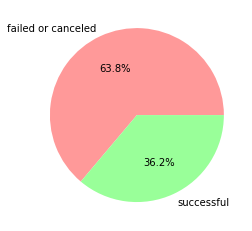

In [10]:
pie_data = df.succeses.value_counts()
plt.pie(pie_data,
        autopct='%1.1f%%',
        labels = ['failed or canceled', 'successful'],
       colors=['#ff9999','#99ff99']);

In [11]:
print((df.succeses == 1).sum())

133851


------

<div id='q1.3'> <h3><a href=#Contents>Q1.3</a></h3></div>


Whats is a name of a project with highest average pay check? Use column `usd_pledged_real` to judge.

In [12]:
tmp_df = df[df['backers'] > 0]

tmp_df['avg_check'] = tmp_df.usd_pledged_real / tmp_df.backers

tmp_df.sort_values(by='avg_check', ascending=False).head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,succeses,backers,country,usd pledged,usd_pledged_real,usd_goal_real,avg_check
ID,,,,,,,,,,,,,,,
472233286,"Hollow Earth Project, Journey to the center of the Earth,",Documentary,Film & Video,USD,2016-11-25,1000000.000,2016-09-26 18:36:53,10000.000,0,1,US,10000.000,10000.000,1000000.000,10000.000
889803741,Post Traumatic Stress (PTSD) Affects Us All,Documentary,Film & Video,USD,2013-09-14,1500000.000,2013-08-15 00:07:18,10000.000,0,1,US,10000.000,10000.000,1500000.000,10000.000
642968820,Nobody: The Movie (Canceled),Film & Video,Film & Video,USD,2015-04-22,60000.000,2015-02-21 23:07:08,10000.000,0,1,US,10000.000,10000.000,60000.000,10000.000


In [13]:
tmp_df[tmp_df.avg_check == tmp_df.avg_check.max()][['name', 'avg_check']]

,name,avg_check
ID,,
1459482568,Patented (9 seasons) food enhancer,10000.000
1767293256,KIRISUTOS PACHYDERM,10000.000
1974395971,21st CENTURY MEDICAL PRACTICE SYSTEM THAT CHANGES THE WORLD,10000.000
2024799289,The Commoner Princess,10000.000
281085395,"""SUNBURN"" - starring Michael Madsen, indie action film",10000.000
472233286,"Hollow Earth Project, Journey to the center of the Earth,",10000.000
642968820,Nobody: The Movie (Canceled),10000.000
889803741,Post Traumatic Stress (PTSD) Affects Us All,10000.000
912587650,The Hare On The Chair - An Easter Legend,10000.000


-----

<div id='q1.4'> <h3> <a href=#Contents>Q1.4</a> </h3></div>

What is the most successful main category (in terms of success percentage)?

In [14]:
df.groupby('main_category', as_index=False)['succeses'].mean()\
                    .sort_values(by='succeses', ascending=False)\
                    .rename(columns = {'succeses' : 'success_rate'})

,main_category,success_rate
3,Dance,0.626
14,Theater,0.602
1,Comics,0.545
10,Music,0.491
0,Art,0.413
6,Film & Video,0.379
8,Games,0.361
4,Design,0.357
12,Publishing,0.315
11,Photography,0.310


### Answer:

-----

<div id='q1.5'> <h3> <a href=#Contents>Q1.5</a> </h3></div>

Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [15]:
df_goals_by_category = df.groupby('category', as_index=False) \
                    .agg({'goal' : 'mean', 'succeses' : 'count'})\
                    .sort_values(by='goal', ascending=False)\
                    .rename(columns = {'goal' : 'mean_goal', 'succeses' : 'times_met'})

In [16]:
df_goals_by_category.head()

,category,mean_goal,times_met
89,Movie Theaters,1594601.436,227
133,Space Exploration,624554.721,312
49,Fantasy,621605.801,337
9,Architecture,476579.702,738
127,Science Fiction,429981.733,735


-----

<div id='q1.6'> <h3> <a href=#Contents>Q1.6</a> </h3></div>

What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

------

In [17]:
df.groupby('category', as_index=False).agg({'usd_pledged_real' : 'sum'}) \
                .rename(columns={'usd_pledged_real' : 'total_pledge'}) \
                .sort_values(by='total_pledge', ascending=False).head()

,category,total_pledge
113,Product Design,628437968.480
136,Tabletop Games,462584782.120
148,Video Games,215755693.790
67,Hardware,154092422.680
39,Documentary,138760134.600


------

<div id='q1.7'> <h3> <a href=#Contents>Q1.7</a> </h3></div>


As one can notice, there are both numerical and object-type data in our dataframe. 
We suggest you to split them to perform EDA separately. 

Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [18]:
numeric_columns = [i for i in df.columns if df[i].dtype != object]
object_columns = [i for i in df.columns if df[i].dtype == object]

In [19]:
numeric_columns.remove('succeses')

### Answer:

In [20]:
len(object_columns)

7

---

<div id='q1.8'> <h3> <a href=#Contents>Q1.8</a> </h3></div>

Let's do a bit of feature engineering. Let's create column `pledge2goal` which define as ratio of `usd_pledged_real` to `goal`. How many outliers are there?

(We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [21]:
df['plenged2goal'] = df['usd_pledged_real'] / df['goal']

In [22]:
q25, q75 = df['plenged2goal'].quantile(.25), df['plenged2goal'].quantile(.75)

iqr = q75 - q25

df_outliers = df[(df['plenged2goal'] < (q25 - 1.5 * iqr)) | (df['plenged2goal'] > (q75 + 1.5 * iqr))]

In [23]:
tmp_df = df.copy()
df_wo_outliers = tmp_df.append(df_outliers).drop_duplicates(keep=False)

### Answer:

In [24]:
print('Number of outliers:\n', df_outliers.shape[0])

Number of outliers:
 18415


---

<div id='q1.9'> <h3> <a href=#Contents>Q1.9</a> </h3></div>

Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions have almost no intersection, the less ratio, the less success.
- D. Distributions have almost no intersection, the less ratio, the bigger success.

In [25]:
df_failed = df[df['succeses'] == 0]
df_sucess = df[df['succeses'] == 1]

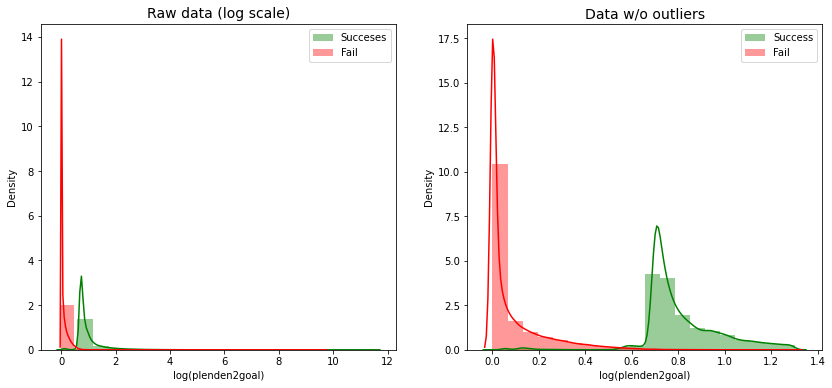

In [26]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.distplot(np.log(df_sucess['plenged2goal'] + 1),
             bins=20,
             label='Succeses',
            color='g')

sns.distplot(np.log(df_failed['plenged2goal'] + 1),
             label='Fail',
             bins=20,
            color='r')

plt.title('Raw data (log scale)', fontsize=14)
plt.xlabel('log(plenden2goal)')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(np.log(df_wo_outliers[df_wo_outliers.succeses == 1]['plenged2goal'] + 1),
             bins=20,
             label='Success',
             color='g')
sns.distplot(np.log(df_wo_outliers[df_wo_outliers.succeses == 0]['plenged2goal'] + 1),
             bins=20,
             label='Fail',
             color='r')
plt.xlabel('log(plenden2goal)')
plt.title('Data w/o outliers', fontsize=14)
plt.legend();

### Answer:
* B. Distributions have almost no intersection, the bigger ratio, the bigger success.
* C. Distributions have almost no intersection, the less ratio, the less success.

-----

<div id='q1.10'> <h3> <a href=#Contents>Q1.10</a> </h3></div>

Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

### Peack for success 

In [27]:
df_wo_outliers[df_wo_outliers.succeses == 1]['plenged2goal']\
                                            .value_counts()\
                                            .sort_values(ascending=False).\
                                            head(1)

1.000    3260
Name: plenged2goal, dtype: int64

### Peack for fail

In [28]:
df_wo_outliers[df_wo_outliers.succeses == 0]['plenged2goal']\
                                            .value_counts()\
                                            .sort_values(ascending=False)\
                                            .head(1)

0.000    50647
Name: plenged2goal, dtype: int64

-----

<div id='q1.11'> <h3> <a href=#Contents>Q1.11</a> </h3></div>

Compute Pearson correlation coefficiton between the pledge2real and target variable. (Round up to second digit after point)

In [29]:
round(df_wo_outliers.corrwith(df_wo_outliers.succeses, method='pearson').plenged2goal, 2)

0.9

-----

<div id='q1.12'> <h3> <a href=#Contents>Q1.12</a> </h3></div>

Visualize dependancy of numerical data with success. What can you say about it?

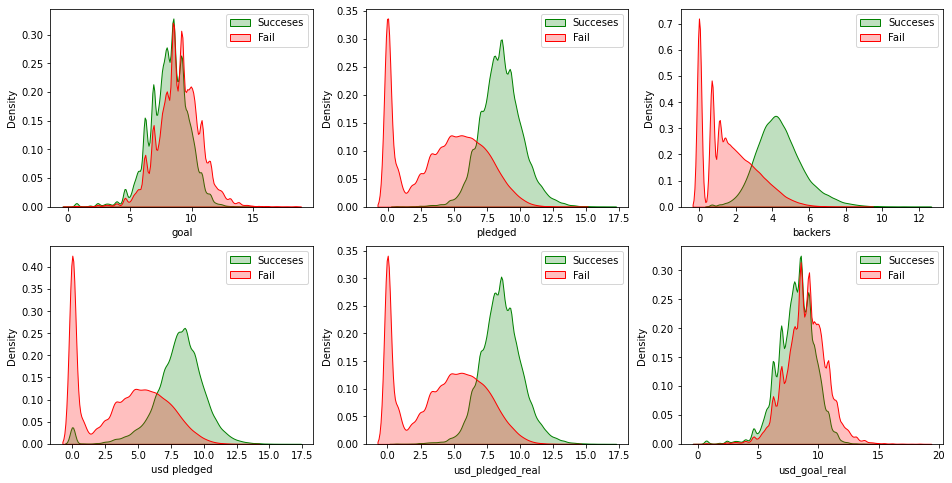

In [30]:
plt.figure(figsize = (16, 8))
for i in range(1, 7):
    plt.subplot(2, 3, i, )
    sns.distplot(np.log(df_sucess[numeric_columns[i- 1]] + 1),
                 label='Succeses', hist=False,
                 kde_kws={'shade': True, 'color' : 'g'})
    sns.distplot(np.log(df_failed[numeric_columns[i- 1]] + 1),
                 label='Fail', hist=False,
                 kde_kws={'shade': True, 'color' : 'r'})
    plt.legend()
    

---

<div id="Section 2"><h1><a href=#Contents>Section 2. Feature generation</a></h1></div>

Lets' generate some more feature that could be useful

<div id='q2.1'> <h3> <a href=#Contents>Q2.1</a> </h3></div>

Create a year column that would hold the year. How many projects were in year 2012?

In [31]:
df['launched'] = pd.to_datetime(df['launched'])


df['year'] = df.launched.dt.year

In [32]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,pledged,succeses,backers,country,usd pledged,usd_pledged_real,usd_goal_real,plenged2goal,year
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,0,0,GB,0.000,0.000,1533.950,0.000,2015
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,0,15,US,100.000,2421.000,30000.000,0.081,2017


### Answer:

In [33]:
print('Number of projects launched in 2012:\n', df[df['year'] == 2012].shape[0])

Number of projects launched in 2012:
 41109


---

<div id='q2.2'> <h3> <a href=#Contents>Q2.2</a> </h3></div>

Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [34]:
df['deadline'] = pd.to_datetime(df['deadline'])

df['duration_days'] = df['deadline'] - df['launched']

df['duration_days'] = df['duration_days'].dt.days

In [35]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,pledged,succeses,backers,country,usd pledged,usd_pledged_real,usd_goal_real,plenged2goal,year,duration_days
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,0,0,GB,0.000,0.000,1533.950,0.000,2015,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,0,15,US,100.000,2421.000,30000.000,0.081,2017,59


### Answer:

In [36]:
df.duration_days.median()

29.0

---

<div id='q2.3'> <h3> <a href=#Contents>Q2.3</a> </h3></div>

Delete mistaken value from column `country`. What is the value?

In [37]:
df.country.value_counts()[-4:]

HK    564
SG    521
LU     61
JP     31
Name: country, dtype: int64

In [38]:
df = df[df['country'] != 'N,0"']

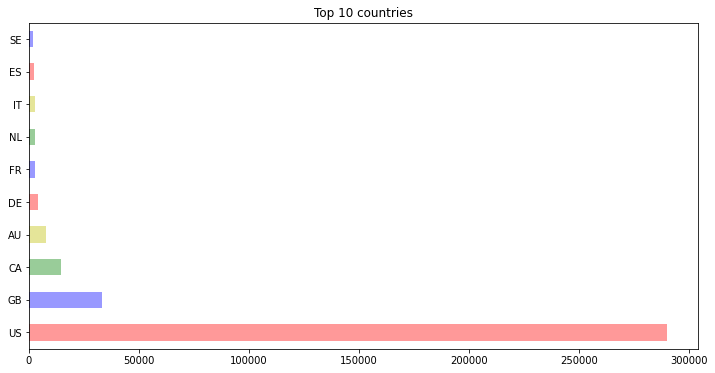

In [39]:
df['country'].value_counts()[:10].plot(kind='barh', 
                                  figsize=(12,6),
                                  title='Top 10 countries',
                                  color=['r', 'b', 'g', 'y'],
                                  alpha=.4);

### Answer:
`N,0"` - mistaken value from `country` column

----

<div id='q2.4'> <h3> <a href=#Contents>Q2.4</a> </h3></div>

Make column `region` out of column `country` (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [40]:
def get_region(country):
    '''
    This function takes coiuntry code in ISO 3166_2 format and returns its region.

    Example:
    get_region('US')
    >>> America
    get_region('JP')
    >>> Asia
    '''    
    region_by_country = {'America': ['US', 'CA', 'MX'],
    'Europe' : ['GB', 'DE', 'FR', 'NL', 'IT', 'ES', 'SE', 'DK', 'IE', 'CH', 'NO', 'BE', 'AT', 'LU'],
    'Asia' :['HK', 'SG', 'JP'],
    'Oceania' : ['AU', 'NZ']} 
    
    for region, country_list in region_by_country.items():
        if country in country_list:
            return region

In [41]:
df['region'] = df['country'].apply(get_region)

In [42]:
df.groupby('region', as_index=False)['succeses'].mean()\
                    .sort_values(by='succeses', ascending=False)\
                    .rename(columns = {'succeses' : 'success_rate'})

,region,success_rate
0,America,0.372
1,Asia,0.359
2,Europe,0.317
3,Oceania,0.270


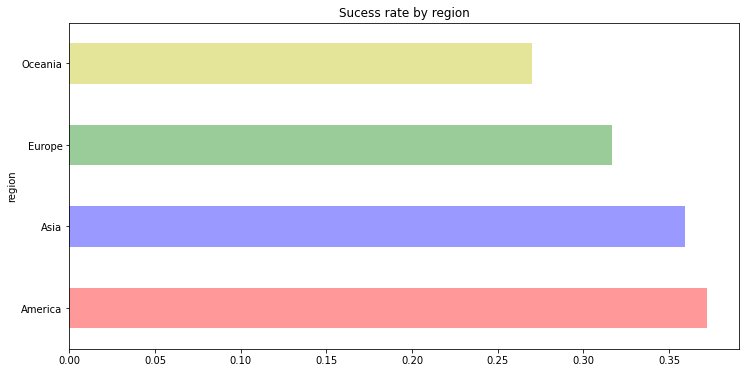

In [43]:
df.groupby('region')['succeses'].mean().plot(kind='barh',
                                  figsize=(12,6),
                                  title='Sucess rate by region',
                                  color=['r', 'b', 'g', 'y'],
                                             alpha=.4);

### Answer:
Region with the lowest sucesses rate - `Oceania`

----

In [44]:
df_xgb = df.copy()

<div id='q2.5'> <h3> <a href=#Contents>Q2.5</a> </h3></div>

What is the most frequent subcategory for design?

In [45]:
df_gp = df.groupby(['main_category', 'category'], as_index=False)['goal'].count()

df_gp = df_gp.reset_index() \
        .sort_values(['main_category','goal'], ascending=False)\
        .drop('index', axis=1) \
        .rename(columns = {'goal' : 'number_of_projects'})

In [46]:
df_gp.head(4)

,main_category,category,number_of_projects
169,Theater,Theater,7036
167,Theater,Plays,1363
166,Theater,Musical,906
164,Theater,Festivals,546


Replacing not top3 sub catgories in `df` with `other`

In [47]:
main_categories_list = list(set(df_gp.main_category.values))

other_sub_categories = [] #list to contain sub categories not in top3
for main_category in main_categories_list:
    other_sub_categories += list(df_gp[df_gp['main_category'] == main_category]['category'][3:])

df['category'] = df['category'].replace(other_sub_categories,'other')

In [48]:
df[df.main_category == 'Design']\
                .groupby('category', as_index=False)['goal']\
                .count()\
                .sort_values(by='goal', ascending=False)\
                .rename(columns={'goal': 'number_of_project'})

,category,number_of_project
2,Product Design,21886
0,Design,4122
1,Graphic Design,1990
3,other,1517


### Answer:
Most popular subcategory for `Design` is `Product Design`

-----

<div id='q2.6'> <h3> <a href=#Contents>Q2.6</a> </h3></div>

Create the column `name_length` with length of the name.
What is the biggets length?

In [49]:
df['name_length'] = df['name'].str.len()

df['name_length'].max()

96

### Answer:
Biggest lengh:
`96`

----

<div id="Section 3"></div> <h1><a href=#Contents>Section 3. Preprocessing</a> </h1>

<div id='q3.1'> <h3> <a href=#Contents>Q3.1 Drop the leaking columns</a> </h3></div>

Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [50]:
leakage_columns = ['pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'plenged2goal']

df = df.drop(leakage_columns, axis=1)

In [51]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,succeses,country,usd_goal_real,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0,GB,1533.950,2015,58,Europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,0,US,30000.000,2017,59,America,45


### Answer:
By definition leakage columns contains information highly correlated with the target variable, and make the predictive model more accurate than it should be. Since we trying to guess does the project succeeds or not information about pledged money and the number of backers should not be available for the model training.


In [52]:
print(leakage_columns)

['pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'plenged2goal']


---

<div id='q3.2'> <h3> <a href=#Contents>Q3.2 Deal with the categorical features.</a> </h3></div>


Lets drop some more columns for now (`name`, `deadline`, `launched`, `country`, `usd_goal_real`). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [53]:
df = df.drop(['name', 'deadline', 'launched', 'country', 'usd_goal_real'], axis=1)

In [54]:
df.head(3)

,category,main_category,currency,goal,succeses,year,duration_days,region,name_length
ID,,,,,,,,,
1000002330,other,Publishing,GBP,1000.000,0,2015,58,Europe,31
1000003930,other,Film & Video,USD,30000.000,0,2017,59,America,45
1000004038,other,Film & Video,USD,45000.000,0,2013,44,America,14


In [55]:
categorical_features = ['category', 'main_category', 'currency', 'region']

Here we will create dummies for categorical features and drop one of them to prevent linear dependance

In [56]:
dummies = pd.get_dummies(df[categorical_features], drop_first=True) #drop one column for every dummy category
df = pd.concat([df, dummies], axis=1).drop(categorical_features, axis=1)

In [57]:
df.head(3)

,goal,succeses,year,duration_days,name_length,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,...,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,region_Asia,region_Europe,region_Oceania
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,1000.000,0,2015,58,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1000003930,30000.000,0,2017,59,45,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000004038,45000.000,0,2013,44,14,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Answer:

In [58]:
print(f'Columns after preprocessing:\n {df.shape[1]}')

Columns after preprocessing:
 78


 ---

<div id='q3.3'> <h3><a href=#Contents>Q3.3 Split the dataset</a> </h3></div>

Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [59]:
df.shape

(370219, 78)

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('succeses', axis=1)
y = df.succeses

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Answer:

In [61]:
print(f'Successful projects:\nTrain: {y_train.sum()} \nTest:  {y_test.sum()}')

Successful projects:
Train: 107134 
Test:  26717


In [62]:
print(f'Success rate:\nTrain: {y_train.mean():.3f}\nTest : {y_test.mean():.3f}')

Success rate:
Train: 0.362
Test : 0.361


---

<div id='q3.4'> <h3> <a href=#Contents>Q3.4 Scale the numeric columns with standard scaler</a> </h3></div>

What is max number in goal field after scaling?

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

numerical_colums = ['goal', 'year', 'duration_days', 'name_length']

X_train[numerical_colums] = scaler.fit_transform(X_train[numerical_colums])

X_test[numerical_colums]= scaler.transform(X_test[numerical_colums])

### Answer:

In [65]:
print(round(X_train.goal.max(), 3))

93.264


---

<div id="Section 4"></div><a href=#Contents><h1>Section 4. Feature selection<a href=#Contents></h1>


<div id='q4.1'> <h3> <a href=#Contents>Q4.1 Estimate feature importance by Anova</a> </h3></div>


What is the two most important features by anova with f classifier?

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=2)
X_anova = selector.fit_transform(X_train, y_train)

anova_feature_importance = pd.DataFrame({'Feature' : X_train.columns,'Score' : selector.scores_})\
                                        .sort_values(by='Score', ascending=False)

### Answer:

In [67]:
anova_feature_importance.head(2)

,Feature,Score
56,main_category_Music,3380.158
59,main_category_Technology,3108.616


------

<div id='q4.2'> <h3> <a href=#Contents>Q4.2 Estimate optimal C for l2 regularization</a> </h3></div>

Build a model with logistic regression

Use l2 penalty and search for optimal `C` in `np.logspace(-2, 4, 7)`.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

#### Best parameters after a grid search specified manually below in a sake of computational resources

In [69]:
logreg_grid_search = GridSearchCV(estimator=LogisticRegression(penalty='l2'),
                                  param_grid={'C' : np.logspace(-2, 4, 7)},
                                  n_jobs=-1,
                                  verbose=10)

logreg_grid_search.fit(X_train, y_train)

clf_logreg = logreg_grid_search.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:  1.5min remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.6min finished


In [70]:
clf_logreg.fit(X_train, y_train)

LogisticRegression(C=1000.0)

### Answer:

In [71]:
print(clf_logreg)

LogisticRegression(C=1000.0)


---

<div id='q4.3'> <h3> <a href=#Contents>Q4.3 What is the accuracy for this params?</a> </h3></div>

In [72]:
y_pred_logreg = clf_logreg.predict(X_test)
y_pred_proba_logred = clf_logreg.predict_proba(X_test)[:,1]

### Answer

In [73]:
print(f'Accuracy:\n{round(accuracy_score(y_test, y_pred_logreg), 3)}')

Accuracy:
0.678


---

<div id='q4.4'> <h3> <a href=#Contents>Q4.4 Most important features by logistic regression</a> </h3></div>

In [74]:
df_logreg_coeff = pd.DataFrame({'Feature' : X_train.columns,
                   'Coefficient' : abs(clf_logreg.coef_[0])}).sort_values(by='Coefficient', ascending=False)

### Answer:

In [75]:
df_logreg_coeff.head()

,Feature,Coefficient
0,goal,14.109
5,category_Apps,2.096
44,category_Web,1.692
2,duration_days,1.240
40,category_Tabletop Games,1.015


---

<div id='q4.5'> <h3> <a href=#Contents>Q4.5 Build roc curve and calculate roc-auc score.</a> </h3></div>

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, y_pred_proba_logred, pos_label=1)

roc_auc_score = round(roc_auc_score(y_test, y_pred_proba_logred), 3)

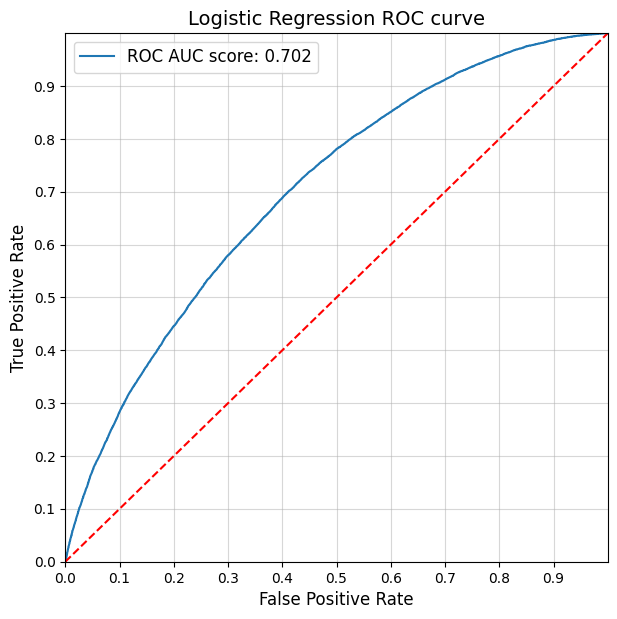

In [77]:
plt.figure(figsize=(7, 7), dpi=100)
plt.title('Logistic Regression ROC curve', fontsize=14)
plt.plot(logreg_fpr, logreg_tpr, label=f'ROC AUC score: {roc_auc_score}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.legend(fontsize =12)

plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

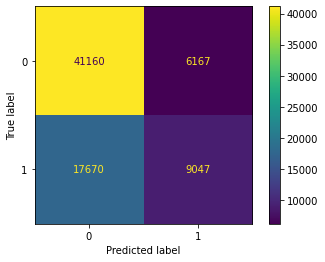

In [78]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_logreg, X_test, y_test);

### Answer:

In [79]:
print(roc_auc_score)

0.702



------

<div id='q4.6'> <h3> <a href=#Contents>Q4.6 Optimal depth and number of trees for RF model.</a> </h3></div>

### Build a random forest model
Use random state `42`, maximum depth from `2` to `15`, and number of estimators in `[10, 20, 50, 100, 200]`

**Note**:

Hyperparameter tuning takes almost 40 min. So, I just specified best parameters manualy.
One can uncomment the cell below to run full procedure

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [81]:
rf_grid_search = GridSearchCV(
    estimator = rf_clf,
    param_grid={'max_depth' : [i for i in range(2, 16)],'n_estimators' : [10, 20, 50, 100, 200]},
    n_jobs=-1,
    verbose=3)

rf_grid_search.fit(X_train, y_train)
rf_clf = rf_grid_search.best_estimator_

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 30.3min finished


### Answer:

In [82]:
rf_clf

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

----

<div id='q4.7'> <h3> <a href=#Contents>Q4.7  Accuracy of RF model.</a> </h3></div>

In [83]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

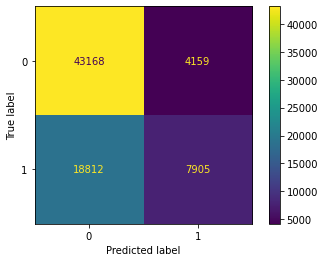

In [84]:
plot_confusion_matrix(rf_clf, X_test, y_test);

### Answer:

In [85]:
print(round(accuracy_score(y_test, y_pred_rf), 3))

0.69


___

<div id='q4.8'> <h3> <a href=#Contents>Q4.8 Build precision-recall curve. What is the precision for recall 0.5?</a> </h3></div>

In [86]:
from sklearn.metrics import precision_recall_curve

y_pred_proba_rf = rf_clf.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rf)

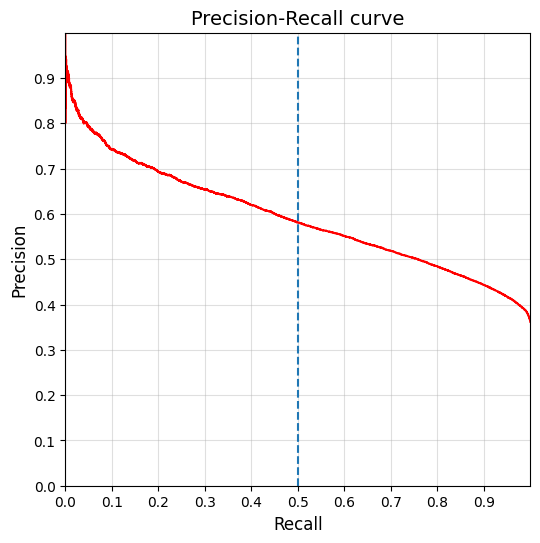

In [87]:
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Precision-Recall curve', fontsize=14)
plt.plot(recall, precision, color='r')
plt.vlines(0.5, 0, 1, ls='--')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)

plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.grid(alpha=.4)

### Answer:

In [88]:
df_precision_recal = pd.DataFrame({'precision' : precision, 'recall' : recall})

df_precision_recal[(df_precision_recal.recall >= 0.5) & (df_precision_recal.recall < 0.5001)]

,precision,recall
45390,0.581,0.500
45391,0.581,0.500
45392,0.581,0.500


---

<div id='q4.9'> <h3> <a href=#Contents>Q4.9 What is the two most important features by random forest?</a> </h3></div>

In [89]:
rf_feature_importance = pd.DataFrame({'Importance': rf_clf.feature_importances_}, index=X_train.columns)\
.sort_values(by='Importance', ascending=False)

<AxesSubplot:title={'center':'Features Importance'}>

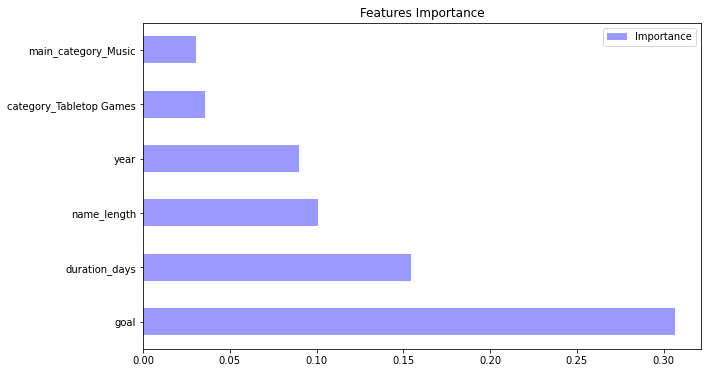

In [90]:
rf_feature_importance[:6].plot(kind='barh',
                                  figsize=(10,6),
                                  title='Features Importance',
                                color=['b'],
                                alpha=.4)

### Answer:

In [91]:
rf_feature_importance.head()

,Importance
goal,0.306
duration_days,0.154
name_length,0.101
year,0.090
category_Tabletop Games,0.036


------

<div id="Section 5"><a href=#Contents><h1>Section 5. Build the stronger model</h1></a></div>

<div id='q5.0'> <h3> <a href=#Contents>Q5.0 Additional data cleaning</a> </h3></div>

####  5.0.1 Remove data with wrong launch date (01.01.1970)

There are some projects that have a missing value for the launched date (this date set to UNIX-time == 0). Lets drop them.

In [92]:
df_xgb = df_xgb[df_xgb.year != 1970]

#### 5.0.2 Drop leakage columns

In [93]:
df_xgb = df_xgb.drop(leakage_columns, axis=1)

In [94]:
df_new = df_xgb.copy()

#### 5.0.3 One may note that there are a lot of projects names with `canceled` in it. It might be also a kind of leakage feature. Let's remove this word.

In [95]:
df_new[df_new.name.str.contains('canceled')].sample(2)

,name,category,main_category,currency,deadline,goal,launched,succeses,country,usd_goal_real,year,duration_days,region
ID,,,,,,,,,,,,,
1748829297,project canceled (Canceled),Photobooks,Photography,USD,2016-01-30,12000.000,2015-12-01 03:45:54,0,US,12000.000,2015,59,America
1258824611,"Project canceled, launching again soon (Canceled)",Documentary,Film & Video,GBP,2015-01-31,100.000,2015-01-14 12:43:16,0,GB,153.180,2015,16,Europe


In [96]:
df_new['name_letters'] = df_new.name.apply(lambda x: ''.join([i for i in x if i.isalpha()]).lower())

In [97]:
df_new.name_letters.replace('cancelled', '', inplace=True)

df_new.name_letters.replace('canceled', '', inplace=True)

#### Now we may note that there were some project names consists only of `cancel` or `cancelled` word. Let's drop em too

In [98]:
df_new[df_new.name_letters == ''].head()

,name,category,main_category,currency,deadline,goal,launched,succeses,country,usd_goal_real,year,duration_days,region,name_letters
ID,,,,,,,,,,,,,,
1188667875,CANCELLED,Shorts,Film & Video,USD,2012-11-15,74000.000,2012-10-01 22:50:26,0,US,74000.000,2012,44,America,
1241244476,. (Canceled),Art,Art,USD,2009-12-16,4000.000,2009-10-14 20:20:59,0,US,4000.000,2009,62,America,
1321768247,............... (Canceled),Photography,Photography,USD,2010-02-02,4900.000,2009-12-08 17:15:10,0,US,4900.000,2009,55,America,
1409648677,(Canceled),Fashion,Fashion,USD,2014-08-24,3000.000,2014-07-25 18:59:03,0,US,3000.000,2014,29,America,
491948968,Cancelled :(,Video Games,Games,USD,2017-07-12,500000.000,2017-06-12 23:05:06,0,US,500000.000,2017,29,America,


In [99]:
df_new = df_new[df_new.name_letters != '']

In [100]:
df_new.shape

(370202, 14)

<div id='q5.1'> <h3> <a href=#Contents>Q5.1 Generate new meaningfull features</a> </h3></div>

#### 5.1.1. Mean & Median goal for category

Creating a new features which shows `mean` & `median` of the `usd_goal_real` for successful projects inside the category.

In [101]:
gp_mean_success_goal = df_new[df_new.succeses == 1]\
                .groupby('category')['usd_goal_real']\
                .mean()

gp_median_success_goal = df_new[df_new.succeses == 1]\
                .groupby('category')['usd_goal_real']\
                .median()

In [102]:
df_new['mean_cat_success_goal'] = df_new['category'].map(gp_mean_success_goal)

df_new['median_cat_success_goal'] = df_new['category'].map(gp_median_success_goal)

#### 5.1.2 (Median / Goal) & (Mean / Goal) ratio

This ratio suppose to show how close the goal stated for the particular project to the mean and median goal of the successful projects from this category

In [103]:
df_new['goal2mean'] = df_new['usd_goal_real'] / df_new['mean_cat_success_goal']

df_new['goal2median'] = df_new['usd_goal_real'] / df_new['median_cat_success_goal']

#### 5.1.3 Month & weekday of the project launch

Creating `weekday` & `month` features

In [104]:
df_new['weekday'] = df_new.launched.dt.weekday
df_new['month'] = df_new.launched.dt.month

#### 5.1.4 Number of words in project name

In [105]:
df_new['num_words'] = df_new.name.apply(lambda string: len(string.split()))

#### 5.1.5 Project name Vowels / letters ratio

In [106]:
def vowels2LettersRatio(s):
    '''Count ratio between vowels and letters in the word'''
    num_vowels = len([i for i in s if i in 'aeiou'])
    return 0 if len(s) == 0 else num_vowels / len(s)
        

In [107]:
# for each name calculate vowels ratio
df_new['name_vowel_ratio'] = df_new.name_letters.apply(vowels2LettersRatio)

#### Drop some features which looks less important

In [108]:
df_new.drop(['name', 'name_letters','deadline', 'goal', 'launched'], axis=1, inplace=True)

#### Dealing with categorical features

In [109]:
categorical_features_new = ['category', 'main_category', 'region', 'country', 'currency']
numerical_features_new = ['usd_goal_real',
                          'year',
                          'duration_days',
                          'mean_cat_success_goal',
                          'median_cat_success_goal',
                         'goal2mean',
                         'goal2median']

In [110]:
dummies_new = pd.get_dummies(df_new[categorical_features_new], drop_first=True) #drop one column for every dummy category

df_new = pd.concat([df_new, dummies_new], axis=1).drop(categorical_features_new, axis=1)

In [111]:
# df_new[categorical_features_new] = df_new[categorical_features_new].astype('category')

# for feature in categorical_features_new:
#     df_new[feature] = df_new[feature].cat.codes

In [112]:
df_new.head()

,succeses,usd_goal_real,year,duration_days,mean_cat_success_goal,median_cat_success_goal,goal2mean,goal2median,weekday,month,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,0,1533.950,2015,58,2417.585,1126.030,0.634,1.362,1,8,...,0,1,0,0,0,0,0,0,0,0
1000003930,0,30000.000,2017,59,17593.963,7000.000,1.705,4.286,5,9,...,0,0,0,0,0,0,0,0,0,1
1000004038,0,45000.000,2013,44,17593.963,7000.000,2.558,6.429,5,1,...,0,0,0,0,0,0,0,0,0,1
1000007540,0,5000.000,2012,29,7003.922,3800.000,0.714,1.316,5,3,...,0,0,0,0,0,0,0,0,0,1
1000011046,0,19500.000,2015,55,9886.174,4000.000,1.972,4.875,5,7,...,0,0,0,0,0,0,0,0,0,1


In [113]:
df_new.shape

(370202, 221)

#### Train & Test split

In [114]:
X_new = df_new.drop('succeses', axis=1)
y_new = df_new.succeses

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,
                                                                    y_new,
                                                                    test_size=0.2,
                                                                    random_state=42)

<div id='q5.2'> <h3> <a href=#Contents>Q5.2 Train an xgboost, that's beat random forest</a> </h3></div>

In [115]:
from xgboost import XGBClassifier

clf_xgb =  XGBClassifier()

params = {'n_estimators' : [80, 100],
          'max_depth' : [8, 12]}
          
xgb_grid_search = GridSearchCV(estimator=clf_xgb,
                               param_grid=params,
                               n_jobs=-1,
                               verbose=10)

xgb_grid_search.fit(X_train_new, y_train_new)

clf_xgb_best = xgb_grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 42.1min remaining: 10.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 53.5min finished


In [116]:
y_pred_xgb = clf_xgb_best.predict(X_test_new)

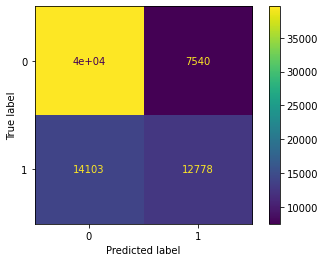

In [117]:
plot_confusion_matrix(clf_xgb_best, X_test_new, y_test_new);

In [118]:
xgb_features_importance = pd.DataFrame({'Feature' : X_train_new.columns,
                                        'Importance' : clf_xgb_best.feature_importances_})\
                                        .sort_values(by='Importance', ascending=False)

In [119]:
xgb_features_importance.head(10)

,Feature,Importance
18,category_Apps,0.033
6,goal2median,0.027
169,main_category_Comics,0.026
178,main_category_Music,0.026
182,main_category_Theater,0.025
78,category_Hip-Hop,0.023
98,category_Mobile Games,0.021
146,category_Tabletop Games,0.021
161,category_Web,0.021
173,main_category_Fashion,0.020


### Final accuracy of XGBoost model

In [120]:
round(accuracy_score(y_test_new, y_pred_xgb), 3)

0.708